# Covid Data Exploration

## Datasets Used
 The first Covid-19 dataset reports the number of 

1.   Total Covid-19 cases for different countries at the end of each day.
2.   Total number of recovered patients for each country at the end of each day.

Both extracted from *Our World In Data* on Feb 2021

# Importing Data

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://evantango.github.io/files/cases_feb_21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
# Visualizing the dataframe
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31100,32800,34278,3607

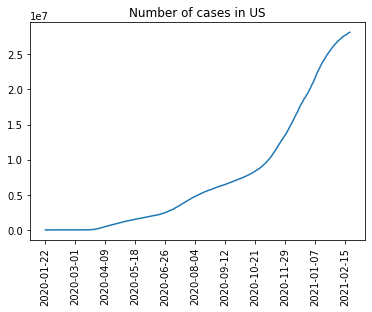

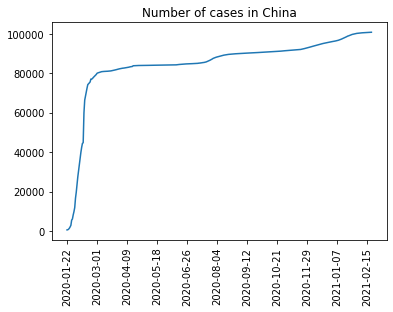

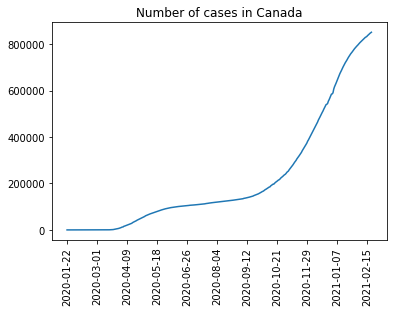

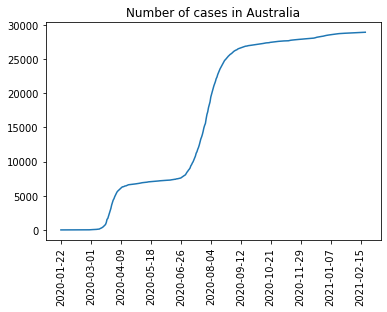

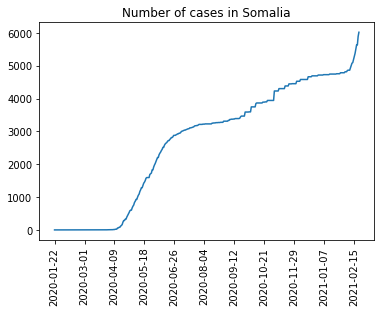

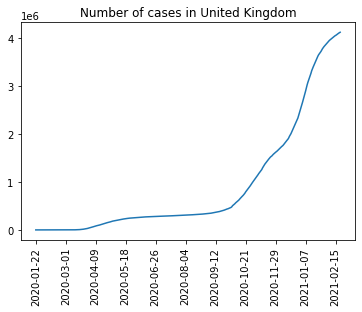

In [ ]:
#Plotting time series of raw cases for 6 countries

import matplotlib.pyplot as plt
import numpy as np

countries = ['US', 'China','Canada' , 'Australia', 'Russia','United Kingdom']

#fig, ax = plt.subplots(6) Using subplots was making the graphs look all squished 

for country in range(len(countries)): 
  plt.plot(cases_raw.loc[countries[country]])
  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title('Number of cases in ' + countries[country])
  plt.show()



In [ ]:
#Scaling each column/date
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cases_std = cases_raw.copy()
cases_std[cases_std.columns] = scaler.fit_transform(cases_std[cases_std.columns]) 


#Showing two example dates
print(round(cases_std['2020-01-26'].mean(),2), round(cases_std['2020-01-26'].std(),2))
print(round(cases_std['2020-03-26'].mean(),2), round(cases_std['2020-01-26'].std(),2))


-0.0 1.0
0.0 1.0


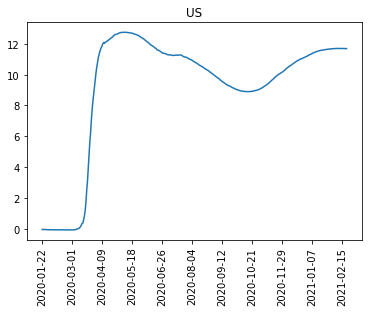

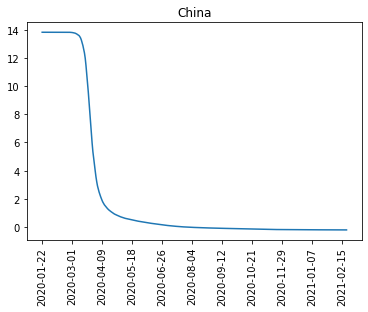

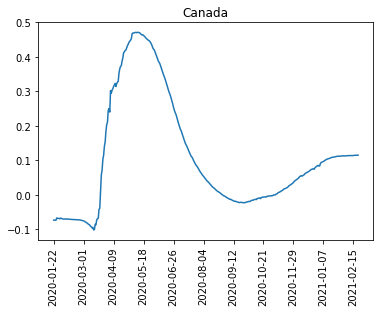

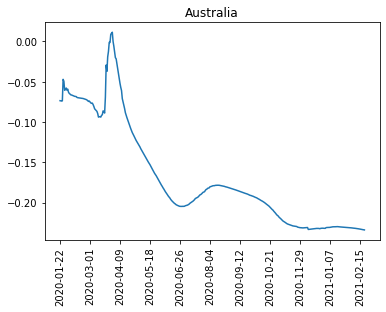

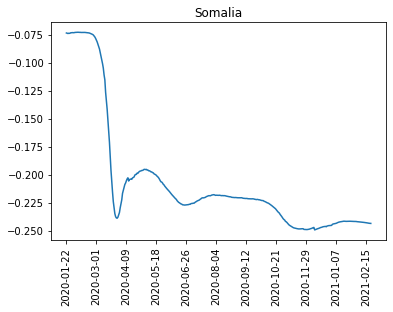

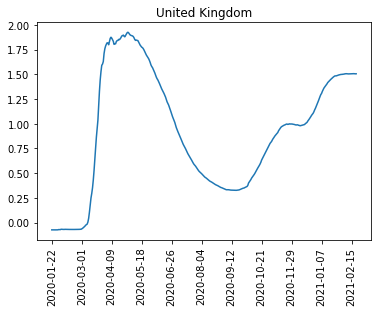

In [ ]:
#Plotting Standardized time-series for the same 6 countries
import matplotlib.pyplot as plt

countries = ['US', 'China','Canada' , 'Australia', 'Russia','United Kingdom']

for country in range(len(countries)): 
  plt.plot(cases_std.loc[countries[country]])
  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title(countries[country])
  plt.show()

# Using PCA to break down the major trends

In [ ]:
#Covariance matrix (cov) using np.cov

import numpy as np
cov = np.cov(cases_std.T)

# verifying shape of covariance matrix
print(cov.shape)

(397, 397)


In [ ]:
#Generating eignevalues/eigenvectors 

eigenValues, eigenVectors = np.linalg.eigh(cov) 

# re-ordering eigenvectors using eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

# Generating the amount of variance explained and the cumulative variance explained
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

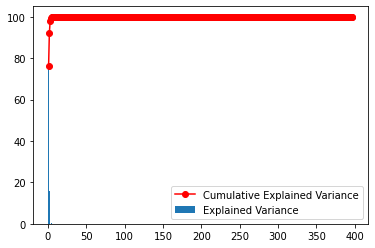

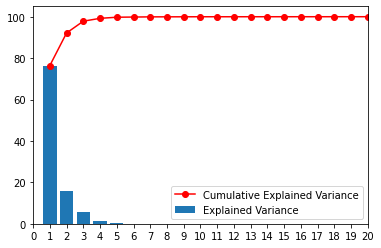

In [ ]:
#Generating Scree Plot 

# Entire Scree Plot - bar 
x = np.arange(eigenValues.shape[0])+1

plt.bar(x,expVar,label='Explained Variance')
plt.plot(x,cumExpVar, 'ro-', label='Cumulative Explained Variance')
plt.legend()
plt.show()

# zooming in on x axis for components 1-20
plt.bar(x,expVar,label='Explained Variance')
plt.plot(x,cumExpVar, 'ro-', label='Cumulative Explained Variance')
plt.xlim([0, 20])
plt.xticks(np.arange(0,21,1))
plt.legend()
plt.show()


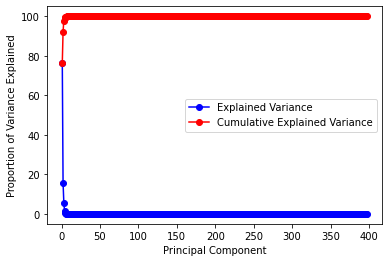

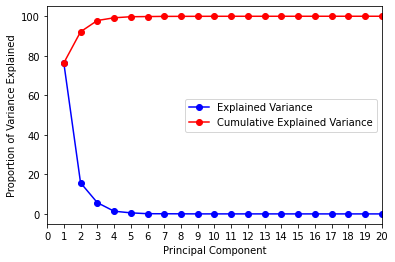

In [ ]:
#3b Different visualization of the scree plot (line plot)  

plt.plot(x, expVar, 'bo-', label='Explained Variance')
plt.plot(x,cumExpVar, 'ro-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend()
plt.show()

# zooming in on first 20 PCs
plt.plot(x, expVar, 'bo-', label='Explained Variance')
plt.plot(x,cumExpVar, 'ro-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend()
plt.xlim([0, 20])
plt.xticks(np.arange(0,21,1))
plt.show()

In [ ]:
#Identifying the number of PCs required to cover 99% of the variance

coverage = 99
# identify the first principal component with a higher cumulative explained variance than 99%
numComponents = np.where(cumExpVar > coverage)[0][0] + 1

print(numComponents,'principle components explains greater than 99% of the variance')
print('Specifically,', numComponents, 'components explain', '%3.2f' %cumExpVar[numComponents-1] + '%', 'of the variance')
print('while', numComponents-1, 'components explain', '%3.2f' %cumExpVar[numComponents-2] + '%', 'of the variance')

4 principle components explains greater than 99% of the variance
Specifically, 4 components explain 99.21% of the variance
while 3 components explain 97.84% of the variance


In [ ]:
#Visualizing a single PC plot 

# dates = cases_raw.columns.values
# pc1 = eigenVectors[:,0]
# plt.plot(dates,pc1)

In [ ]:
## Plot attempt 1
# plt.subplot(4, 4, 1)
# plt.plot(dates,pc1)
# plt.xticks(np.arange(0, 397, 50),rotation=90)

# plt.subplot(4, 4, 2)
# plt.plot(dates,pc2)
# plt.xticks(np.arange(0, 397, 50),rotation=90)

# fig = plt.subplots(4,4,sharex='col')
# fig=plt.figure(figsize=(20,25))
# ax1 = plt.subplot(4,4,1)
# plt.plot(dates,eigenVectors[:,0])
# plt.xticks(np.arange(0, 397, 50),rotation=90)

# for i in range(1,17):
#   plt.subplot(4,4,i,sharex=ax1)
#   plt.plot(dates,eigenVectors[:,i-1])
#   plt.xticks(np.arange(0, 397, 50),rotation=90)
#   plt.title('PC' + str(i))

# plt.show()


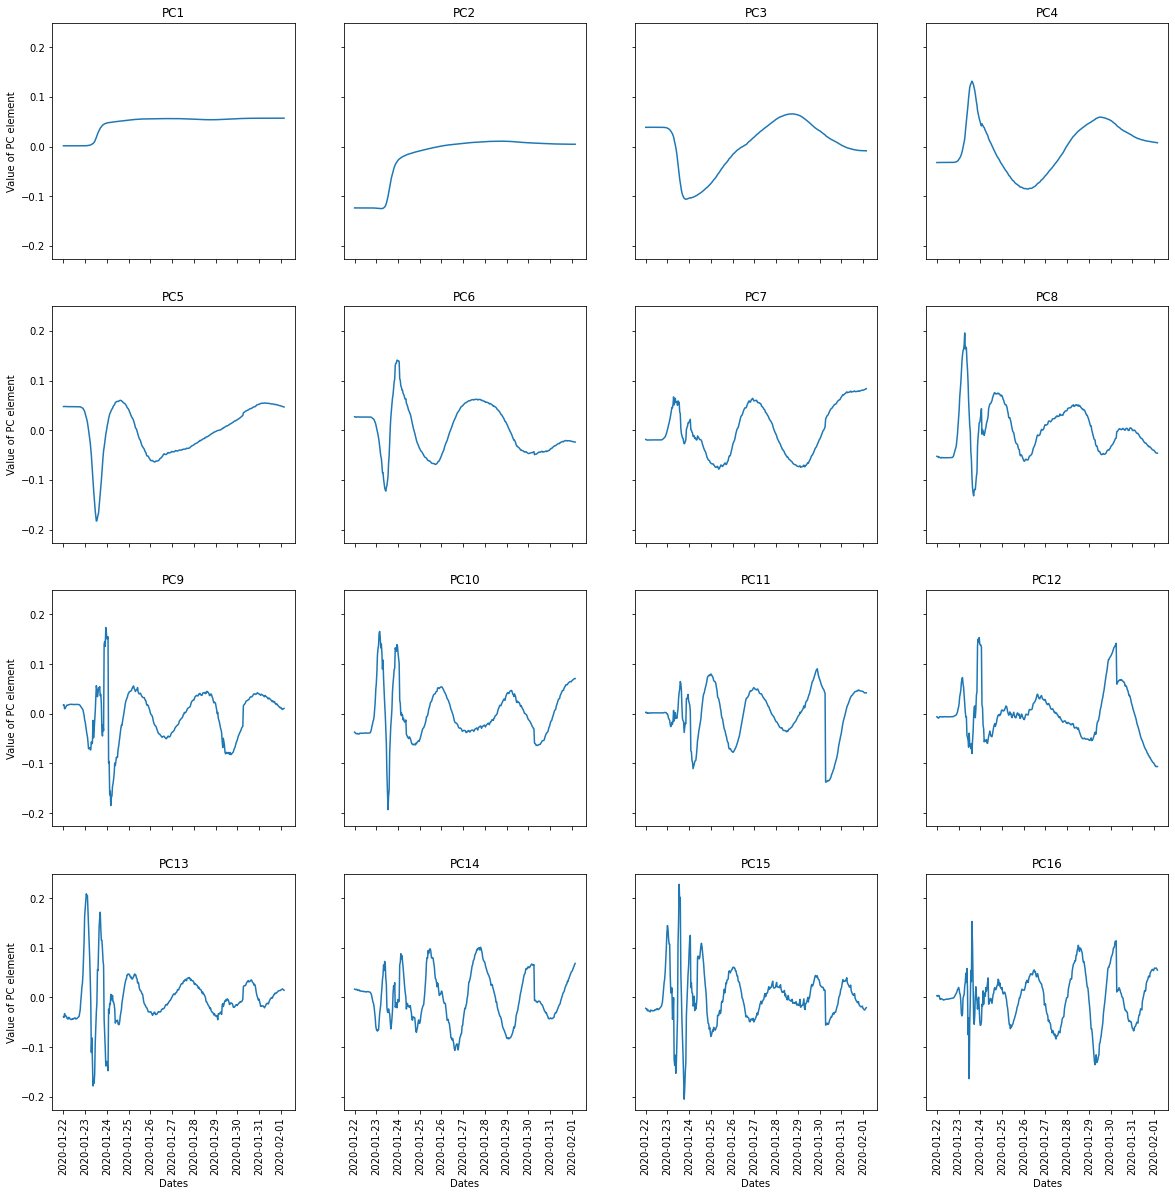

In [ ]:
#Plotting the first 16 PCs as a time series
dates = cases_raw.columns.values
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(20,20))
#axs.set_xticklabels(np.arange(0, 397, 50),rotation=90)
#axs.set_xticklabels(np.arange(0, 397, 50), rotation=90 )
for i in range(4):
  for j in range(4):
    k = i*4 + j
    axs[i,j].plot(dates,eigenVectors[:,k])
    axs[i,j].set_title('PC' + str(k+1))
    axs[i,j].set_xticks(np.arange(0, 397, 39))
    axs[i,j].set_xticklabels(dates,rotation=90 )
    if i == 3: 
      axs[i,j].set_xlabel('Dates')
    if j == 0:
      axs[i,j].set_ylabel('Value of PC element')




# Reconstruct Rates using PCs

In [ ]:
# Function that takes country as input
# 1.) plots the original and standardized time series for a particular country
# 2.) plots the incremental reconstruction of the trend using PCs
# 3.) plots the residual error and RMSE of the reconstruction

from sklearn.metrics import mean_squared_error

def PCA_reconstruct(countryName, cases_raw=cases_raw, preprocess = True, eigenVectors = eigenVectors):
  #Data Preprocessing 
  scaler = StandardScaler()
  cases_std = cases_raw.copy()
  cases_std[cases_std.columns] = scaler.fit_transform(cases_std[cases_std.columns]) 
  
  # Implementation for Part 5, allows calling an external matrix of eigenVectors
  if preprocess == True:
    cov = np.cov(cases_std.T)
    eigenValues, eigenVectors = np.linalg.eigh(cov) 
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
  
  #1 Plot of Original time series
  plt.plot(dates,cases_raw.loc[countryName])
  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title("Original time series for " + countryName)
  plt.xlabel("Dates")
  plt.ylabel('Number of Cases')
  plt.show()

  #1 Plot of standardized time series
  plt.plot(dates,cases_std.loc[countryName])
  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title("Standardized time series for " + countryName)
  plt.xlabel("Dates")
  plt.ylabel('Standardized rate')
  plt.show()

  #2 Reconstruction with 1 PC
  W1 = eigenVectors[:, 0:1]
  P1 = np.dot(cases_std.loc[countryName],W1) # projection matrix
  R1 = np.dot(P1,W1.T) # Reconstructed - standardized values
  R1_T = scaler.inverse_transform(R1)

  # print(W1.shape, P1.shape, R1_T.shape)
  # print(R1_T[0:10])
  # plt.plot(dates,R1_T)
  # plt.show()

  #Reconstruction with first 2 PCs
  W2 = eigenVectors[:, 0:2]
  P2 = np.dot(cases_std.loc[countryName],W2)
  R2 = np.dot(P2,W2.T)
  R2_T = scaler.inverse_transform(R2)

  # print(W2.shape, P2.shape, R2_T.shape)
  # print(R2_T[0:10])
  # plt.plot(dates,R1_T)
  # plt.show()

  #Reconstruction with first 4 PCs
  W3 = eigenVectors[:, 0:4]
  P3 = np.dot(cases_std.loc[countryName],W3)
  R3 = np.dot(P3,W3.T)
  R3_T = scaler.inverse_transform(R3)

  # print(W3.shape, P3.shape, R3_T.shape)
  # print(R3_T[0:10])
  # plt.plot(dates,R1_T)
  # plt.show()

  #Reconstruction with first 8 PCs
  W4 = eigenVectors[:, 0:8]
  P4 = np.dot(cases_std.loc[countryName],W4)
  R4 = np.dot(P4,W4.T)
  R4_T = scaler.inverse_transform(R4)

  #Reconstruction with first 16 PCs
  W5 = eigenVectors[:, 0:16]
  P5 = np.dot(cases_std.loc[countryName],W5)
  R5 = np.dot(P5,W5.T)
  R5_T = scaler.inverse_transform(R5)

  #Plot reconstructed values
  plt.plot(dates, R1_T, label="1 Component")
  plt.plot(dates, R2_T, label="2 Components")
  plt.plot(dates, R3_T, label="4 Components")
  plt.plot(dates, R4_T, label="8 Components")
  plt.plot(dates, R5_T, label="16 Components")

  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title("Incremental Reconstruction for " + countryName)
  plt.xlabel("Dates")
  plt.ylabel('Reconstructed Case Number')
  plt.legend()
  plt.show()

  #3 Calculate residual error
  res1 = R1_T- cases_raw.loc[countryName]
  res2 = R2_T- cases_raw.loc[countryName]
  res3 = R3_T- cases_raw.loc[countryName]
  res4 = R4_T- cases_raw.loc[countryName]
  res5 = R5_T- cases_raw.loc[countryName]
   
  #Plot Residuals
  plt.plot(dates, res1,label="Residual error for 1 Component" )
  plt.plot(dates, res2,label="Residual error for 2 Components" )
  plt.plot(dates, res3,label="Residual error for 4 Components" )
  plt.plot(dates, res4,label="Residual error for 8 Components" )
  plt.plot(dates, res5,label="Residual error for 16 Components" )  
  plt.xticks(np.arange(0, 397, 39),rotation=90)
  plt.title("Residual Error for each reconstruction")
  plt.xlabel("Dates")
  plt.ylabel('Residual Error')
  plt.legend()
  plt.show()

  #4 RMSE calculation
  rms1 = mean_squared_error(cases_raw.loc[countryName], R1_T, squared=False)
  rms2 = mean_squared_error(cases_raw.loc[countryName], R2_T, squared=False)
  rms3 = mean_squared_error(cases_raw.loc[countryName], R3_T, squared=False)
  rms4 = mean_squared_error(cases_raw.loc[countryName], R4_T, squared=False)
  rms5 = mean_squared_error(cases_raw.loc[countryName], R5_T, squared=False)

  rmse = [rms1,rms2,rms3,rms4,rms5]
  components = ['1','2','4','8','16']
  plt.plot(components, rmse)
  plt.title('RMSE of reconstruction')
  plt.xlabel('Number of Components')
  plt.ylabel('RMSE')
  plt.show()

#  return R1_T, R2_T, R3_T

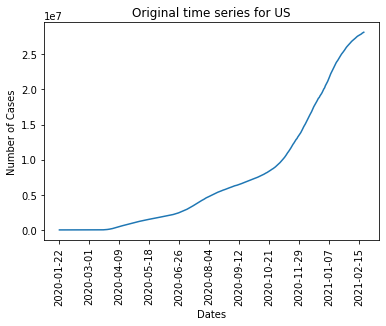

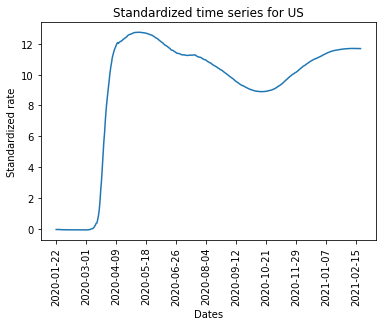

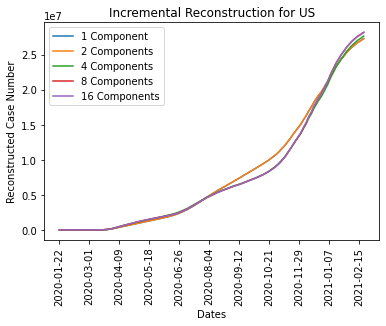

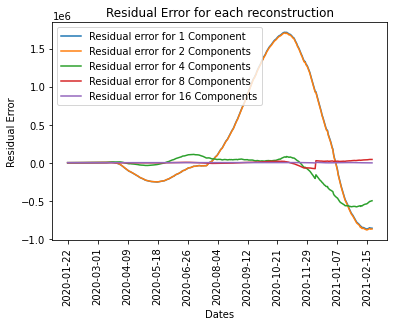

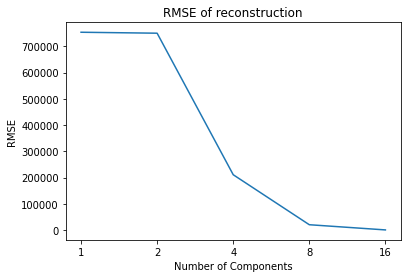

In [ ]:
PCA_reconstruct('US')

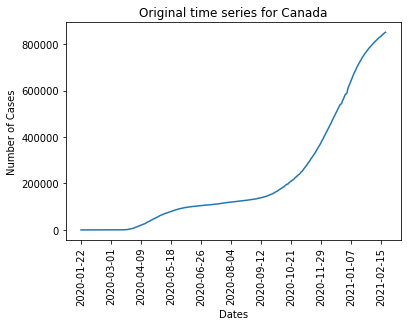

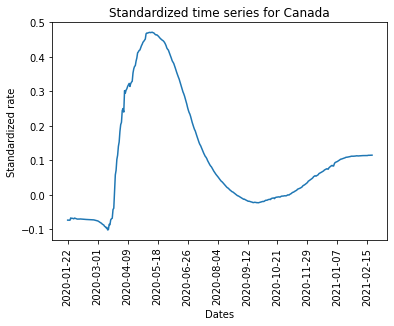

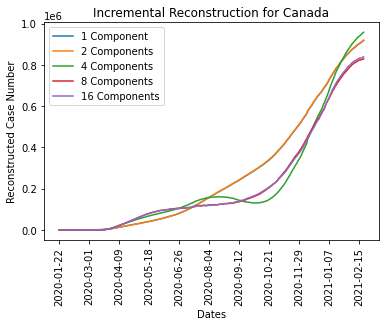

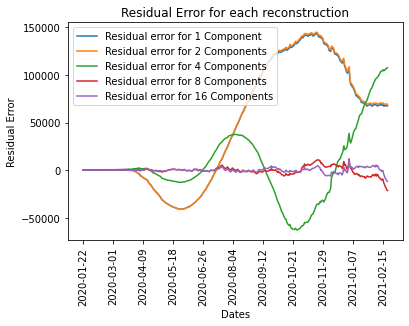

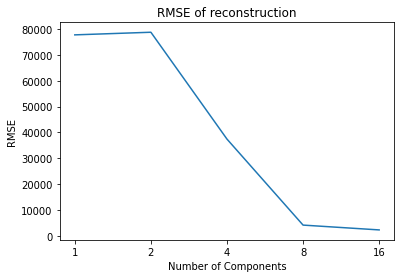

In [ ]:
PCA_reconstruct('Canada')

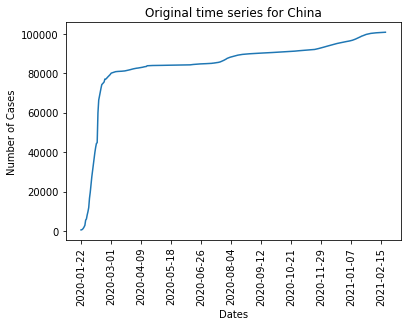

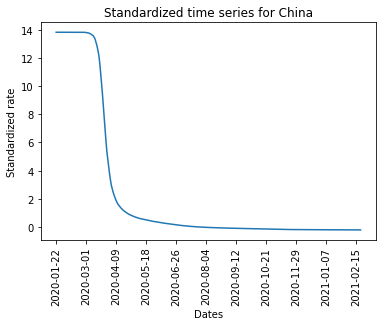

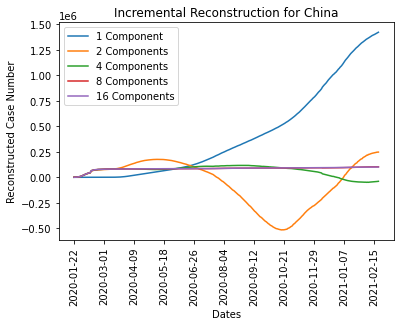

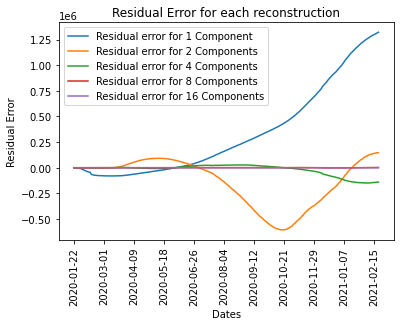

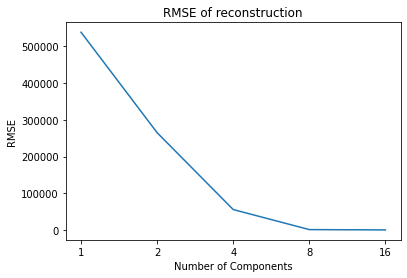

In [ ]:
PCA_reconstruct('China')

# Using dataset 2 on recovered patients 

Using the reconstruction function on recovered cases

In [ ]:
import pandas as pd
recovered_raw = pd.read_csv(
    filepath_or_buffer='https://evantango.github.io/files/recovered_feb_21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
# Identifying the zero values in US because there are data issues

locZero = np.where(np.array(recovered_raw.loc['US'])==0)
print(locZero)
# 0-17 seem legitimate, 327 and beyond do not
print(dates[327]) 

# using the date above to replace zeros with last value (fillna, ffill)
recovered_raw_temp = recovered_raw.transpose()
recovered_raw_temp.index = pd.to_datetime(recovered_raw_temp.index) 
mask = (recovered_raw_temp.index >= dates[327])&(recovered_raw_temp['US']==0)
recovered_raw_temp['US'][mask] = None
recovered_raw_temp['US_impute'] = recovered_raw_temp['US'].fillna(method='ffill')
# recovered_raw_temp['US_impute2'] = recovered_raw_temp['US'].interpolate(method='polynomial', order=2, limit = 100, inplace=True)

# plt.plot(recovered_raw.loc['US'])
# plt.plot(recovered_raw_temp['US_impute'])
# plt.show()

recovered_raw.loc['US'] = recovered_raw_temp['US_impute']

# recovered_raw.loc['US_impute2'] = recovered_raw_temp['US_impute2']

# plt.plot(recovered_raw.loc['US_impute'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,
       348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
       361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396]),)
2020-12-14


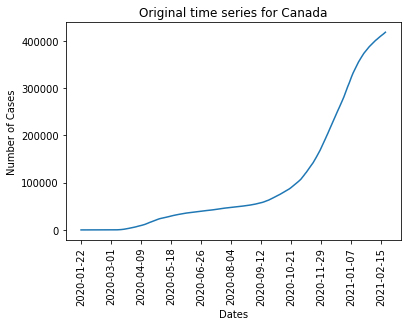

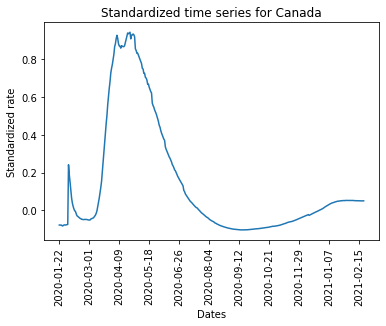

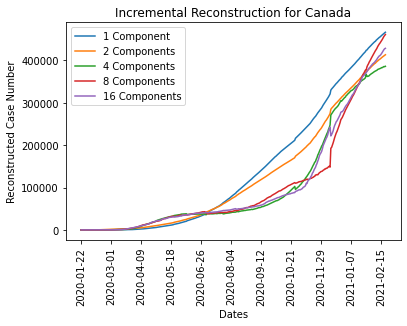

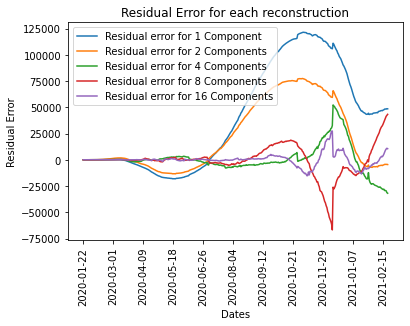

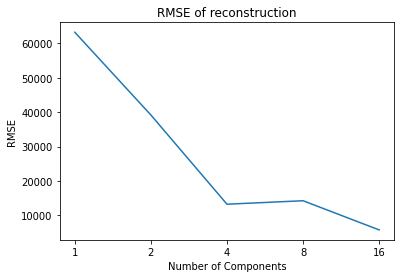

In [ ]:
PCA_reconstruct('Canada',recovered_raw)

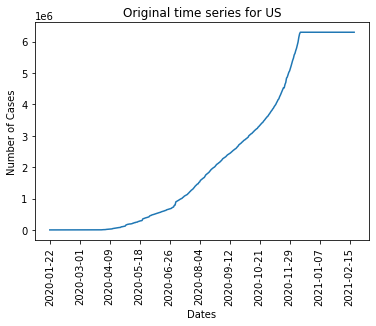

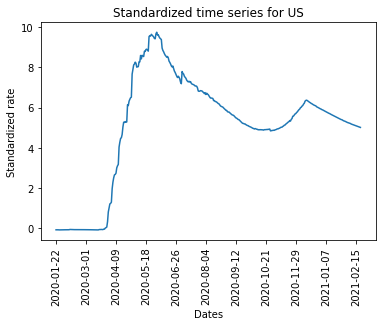

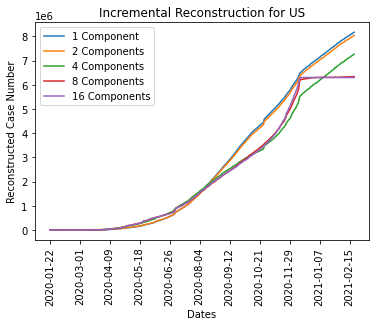

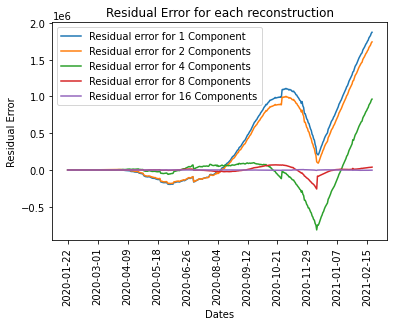

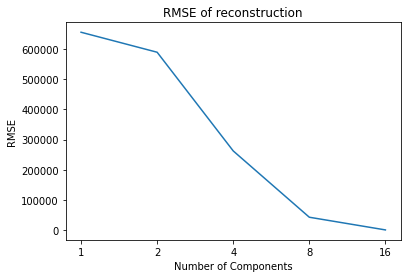

In [ ]:
PCA_reconstruct('US',recovered_raw)

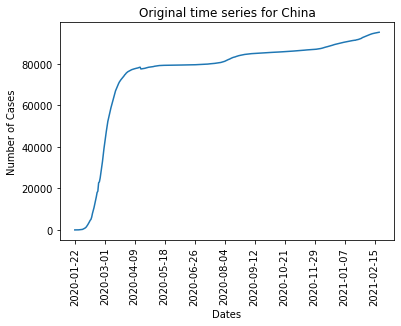

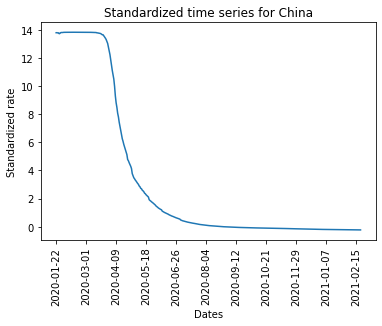

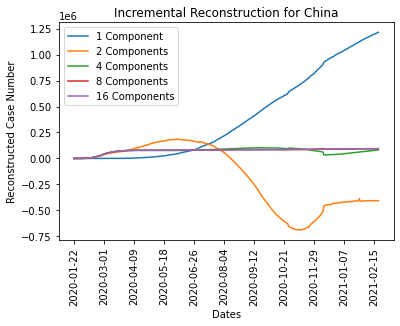

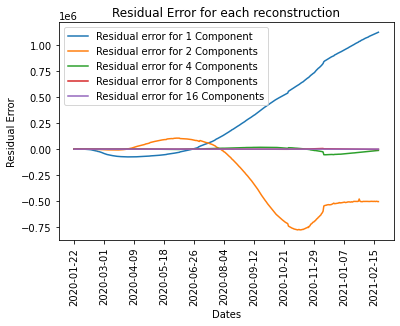

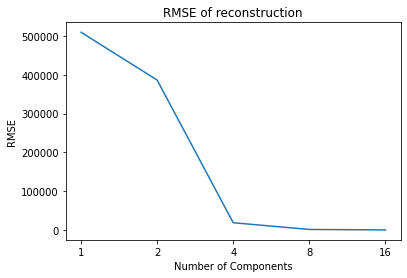

In [ ]:
PCA_reconstruct('China',recovered_raw)